<a href="https://colab.research.google.com/github/liyashaji/weight_category_prediction/blob/main/weight_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Weight Category Prediction

In [40]:
!pwd


/content


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('/content/Weight prediction dataset (1).csv')

###Exploratory data analysis

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


In [14]:
print(data.describe())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


In [15]:
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Underweight'
    elif ind==1:
        return 'Underweight'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obese'
    elif ind==5:
        return 'Extremely Obese'

data['Index'] = data['Index'].apply(give_names_to_indices)


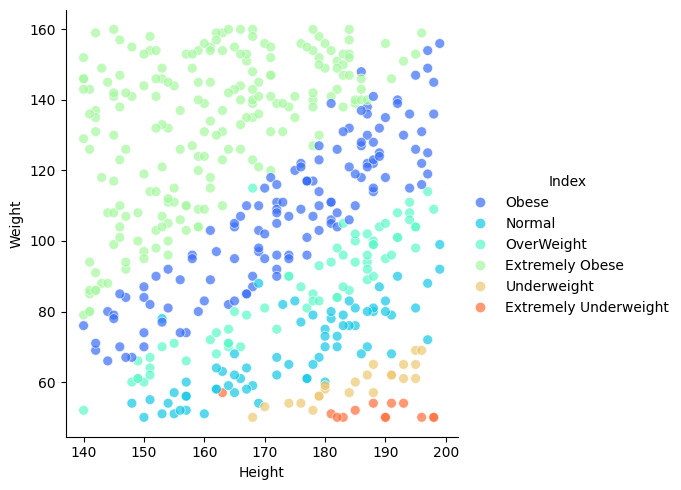

In [16]:
sns.relplot(x='Height', y='Weight', data=data, hue='Index', palette='rainbow', s=50, alpha=0.7)

people = data['Gender'].value_counts()

categories = data['Index'].value_counts()

In [17]:
data[data['Gender']=='Male']['Index'].value_counts()

Extremely Obese          105
Obese                     59
OverWeight                32
Normal                    28
Underweight               15
Extremely Underweight      6
Name: Index, dtype: int64

In [18]:
data[data['Gender']=='Female']['Index'].value_counts()

Extremely Obese          93
Obese                    71
Normal                   41
OverWeight               36
Underweight               7
Extremely Underweight     7
Name: Index, dtype: int64

In [19]:
data2 = pd.get_dummies(data['Gender']) #create dummy variables for categorical values
data.drop('Gender',axis=1,inplace=True) #Remove original and replace with dummy
data = pd.concat([data,data2],axis=1)

y=data['Index']
data =data.drop(['Index'],axis=1) #This removes 'Index' (assumed to be the target variable.)

scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)

In [20]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

Algorithms used for prediction are:
- Decision Tree
- Random Forest
- Logistic Regression

In [21]:
#Decision tree
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [22]:
# weight category prediction
pred = dt.predict(X_test)

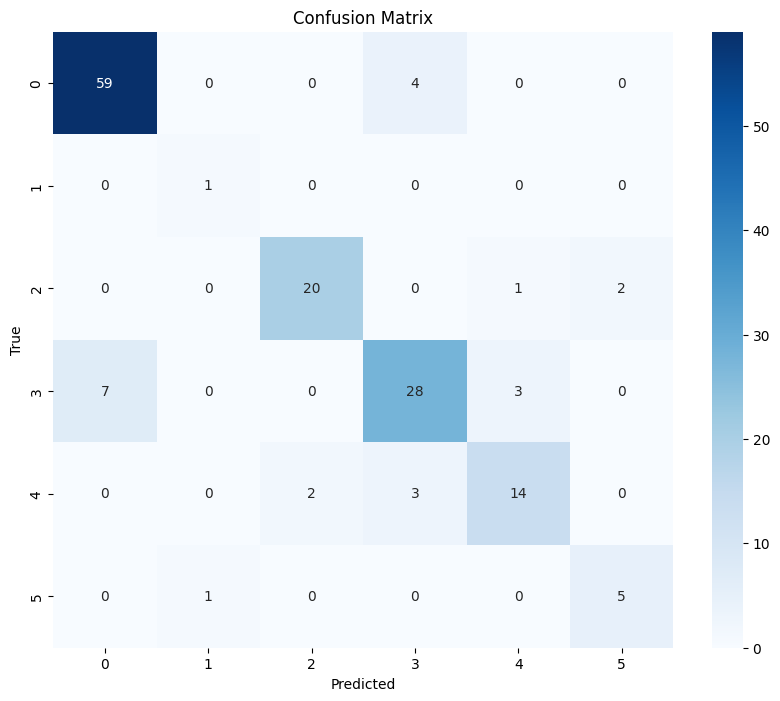

In [23]:
#Confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
print('Acuuracy: ',accuracy_score(y_test,pred)*100)

Acuuracy:  84.66666666666667


In [25]:
print(classification_report(y_test,pred))

                       precision    recall  f1-score   support

      Extremely Obese       0.89      0.94      0.91        63
Extremely Underweight       0.50      1.00      0.67         1
               Normal       0.91      0.87      0.89        23
                Obese       0.80      0.74      0.77        38
           OverWeight       0.78      0.74      0.76        19
          Underweight       0.71      0.83      0.77         6

             accuracy                           0.85       150
            macro avg       0.77      0.85      0.79       150
         weighted avg       0.85      0.85      0.85       150



In [26]:
#Random Forest
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [27]:
# weight category prediction
pred = rf.predict(X_test)

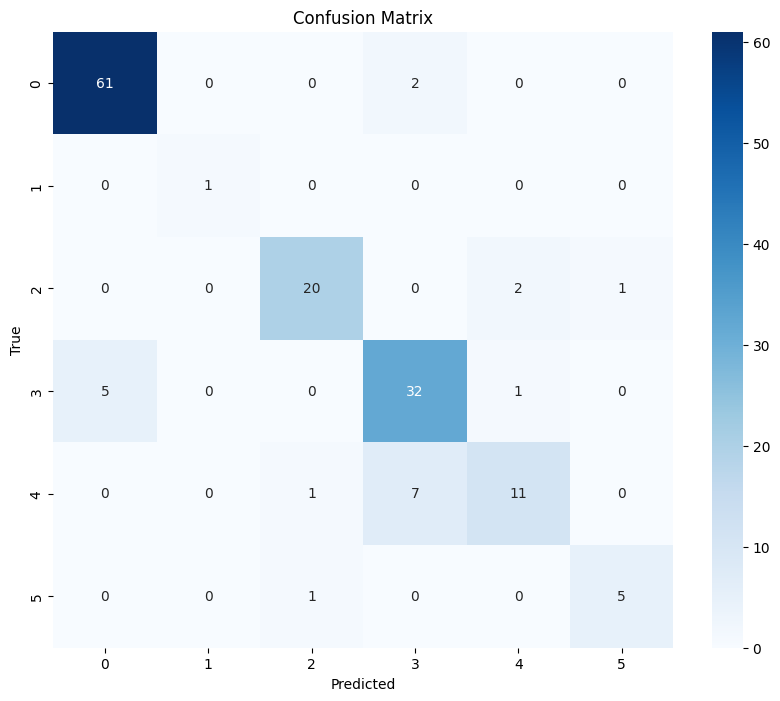

In [28]:
#Confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [29]:
print('Acuuracy: ',accuracy_score(y_test,pred)*100)

Acuuracy:  86.66666666666667


In [30]:
print(classification_report(y_test,pred))

                       precision    recall  f1-score   support

      Extremely Obese       0.92      0.97      0.95        63
Extremely Underweight       1.00      1.00      1.00         1
               Normal       0.91      0.87      0.89        23
                Obese       0.78      0.84      0.81        38
           OverWeight       0.79      0.58      0.67        19
          Underweight       0.83      0.83      0.83         6

             accuracy                           0.87       150
            macro avg       0.87      0.85      0.86       150
         weighted avg       0.86      0.87      0.86       150



In [31]:
#Logistic Regression
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)

LogisticRegression(random_state=101)

In [32]:
# weight category prediction
pred = lr.predict(X_test)

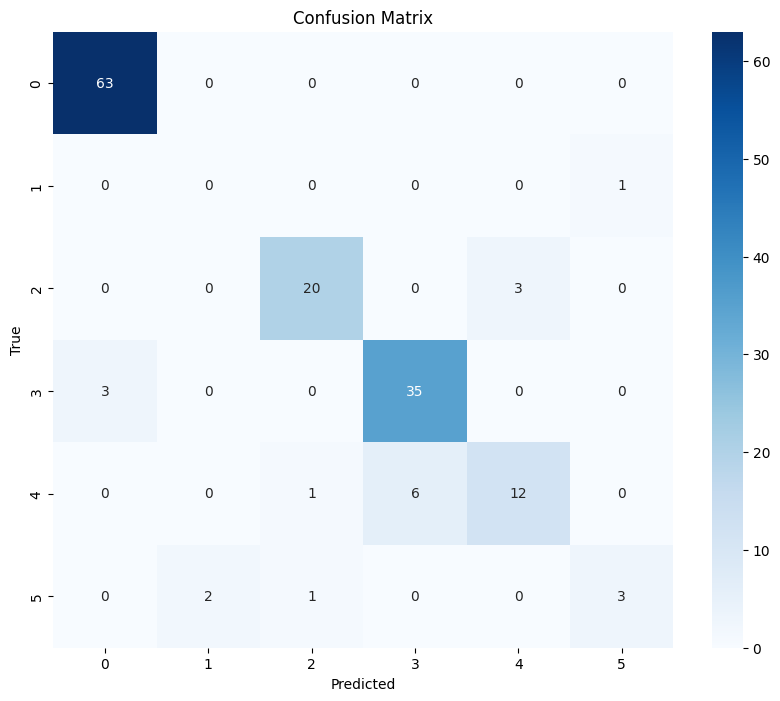

In [33]:
#Confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [34]:
print('Acuuracy: ',accuracy_score(y_test,pred)*100)

Acuuracy:  88.66666666666667


In [35]:
print(classification_report(y_test,pred))

                       precision    recall  f1-score   support

      Extremely Obese       0.95      1.00      0.98        63
Extremely Underweight       0.00      0.00      0.00         1
               Normal       0.91      0.87      0.89        23
                Obese       0.85      0.92      0.89        38
           OverWeight       0.80      0.63      0.71        19
          Underweight       0.75      0.50      0.60         6

             accuracy                           0.89       150
            macro avg       0.71      0.65      0.68       150
         weighted avg       0.89      0.89      0.88       150



###Result
- The decision tree gave an accuracy of arround 85%
- The Random forest gave an accuracy of arround 87%
- The logistic regression gave an accuracy of arround 89%

From this we get that Logistic regression is more accurate than the others. Hence, chosen to predict the weight category

In [36]:
def final_pred(details):
    gender = details[0]
    height = details[1]
    weight = details[2]

    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])

    y_pred = lr.predict(scaler.transform(details))
    return (y_pred[0])

In [38]:
#Prediction
your_details = ['Female',200,64]
print(final_pred(your_details))

Extremely Underweight
